# EJEMPLOS DE TOKENIZACION 😐

In [8]:
import nltk
from nltk.tokenize import word_tokenize

# si es primera vez que utilizas la libreria nltk tienes que utilizar este comando

nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

QUE ES "punkt_tab"

In [ ]:
"""
es una versión del modelo Punkt (el tokenizador de oraciones y palabras
por defecto de NLTK) que puede ser utilizado en contextos o idiomas específicos.

Si estás trabajando con el idioma español, asegúrate de que el tokenizador
de oraciones tenga cargados los recursos correctos. El recurso general más
común para tokenizar oraciones es simplemente punkt. Si tu código solo necesita
punkt, el comando sería nltk.download('punkt').
"""

# ES IMPORTANTE QUE CONSIDEREN LOS ERRORES QUE PUEDE ACARREAR NO COLOCAR ESE COMANDO

CONTINUEMOS CON EL EJEMPLO...

In [41]:
texto = "The running dogs were happily jumping over the obstacles and they saw many better opportunities."

# token de palabras individuales

token = word_tokenize(texto)

print(token)

['The', 'running', 'dogs', 'were', 'happily', 'jumping', 'over', 'the', 'obstacles', 'and', 'they', 'saw', 'many', 'better', 'opportunities', '.']


VAMOS A QUITAR LAS PALABRAS DE PARADA PARA QUE EL TOKEN QUEDE LIBRE

In [42]:
from nltk.corpus import stopwords

# Ejecuten esta linea de comandos si es primera vez que utilizan stowords de nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
palabras_parada = set(stopwords.words('english'))

# mediante comprension de listas

token_sin_parada = [
  palabra for palabra in token
  if palabra.lower() not in palabras_parada
]

print(token_sin_parada)

['running', 'dogs', 'happily', 'jumping', 'obstacles', 'saw', 'many', 'better', 'opportunities', '.']


# LEMATIZACION Y STEAMING 😐

In [ ]:
"""
QUE ES LA LEMATIZACION: DEFICION PRACTRICA.
La lematización es el proceso de reducir una palabra a su lema (forma base de diccionario).
"""

"""
QUE ES EL STEAMING: DEFINICION PRACTICA.
El stemming es el proceso de cortar los sufijos y prefijos de una palabra
para obtener una raíz (stem) simplificada.
"""

LEMATIZACION

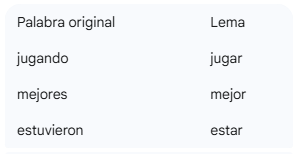

STEAMING

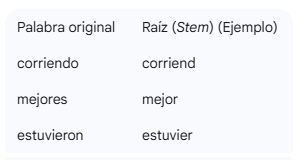

In [ ]:
"""
CONTINUEMOS CON EL EJEMPLO QUE TENIAMOS ANTES Y APLIQUEMOS LOS CONOCIMIENTOS QUE TENEMOS
"""

In [30]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# 1. Descargar recursos (solo la primera vez)
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [23]:
lemmatizer = WordNetLemmatizer()

# ANTES DE CONTINUAR... 😐

In [ ]:
"""
Las Etiquetas POS (Part-of-Speech tagging o etiquetado de categoría gramatical)
son una técnica fundamental en el Procesamiento del Lenguaje Natural (PLN) que
consiste en asignar a cada palabra de un texto su correspondiente categoría
gramatical (o parte del discurso) basándose en su definición y su contexto.

Categoría Gramatical: La etiqueta indica si una palabra es un sustantivo (N),
un verbo (V), un adjetivo (ADJ), un adverbio (ADV), un artículo (DET),
una preposición (P), etc.
"""

In [ ]:
"""
NLTK utiliza etiquetas POS tipo Treebank (como 'VBG', 'NN', 'JJ'),
pero el WordNetLemmatizer solo acepta cuatro categorías principales
(wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV).
"""

"""
LOS QUE ACEPTA SON:
'J' para adjetivos
'V' para verbos
'N' para sustantivos
'R' para adverbio
"""

OTROS JUEGOS DE ETIQUETAS PARA NLTK

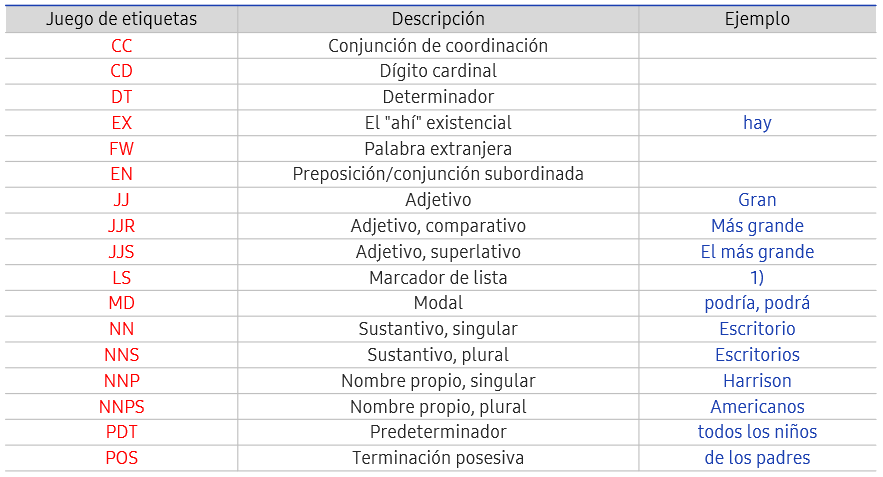

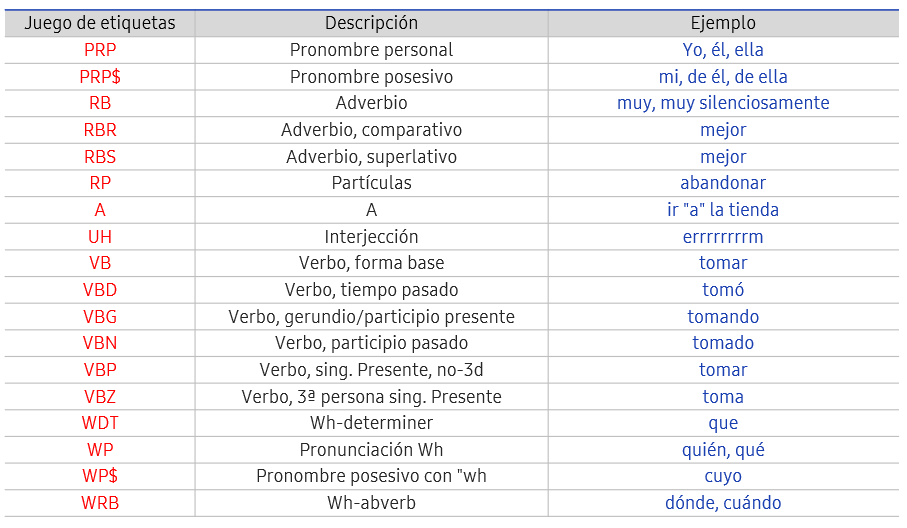

In [ ]:
"""
conviene entonces tener una forma de saber si una palabra es alguna de las mecionadas
en el parrafo anterior (adjetivos, verbos, sustantivos o adverbios)
"""

In [31]:
def obtener_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ  # Adjetivo
    elif treebank_tag.startswith('V'):
        return wordnet.VERB # Verbo
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN # Sustantivo
    elif treebank_tag.startswith('R'):
        return wordnet.ADV  # Adverbio
    else:
        # Por defecto, devuelve sustantivo
        return wordnet.NOUN

In [44]:
etiquetas_pos = nltk.tag.pos_tag(token_sin_parada)
print(etiquetas_pos)

[('running', 'VBG'), ('dogs', 'NNS'), ('happily', 'RB'), ('jumping', 'VBG'), ('obstacles', 'NNS'), ('saw', 'VBD'), ('many', 'JJ'), ('better', 'JJR'), ('opportunities', 'NNS'), ('.', '.')]


In [45]:
lemas_finales = []

for palabra, etiqueta in etiquetas_pos:

    # Obtener la etiqueta POS de WordNet
    pos_wordnet = obtener_wordnet_pos(etiqueta)

    # Lematizar usando la palabra y su etiqueta POS
    lema = lemmatizer.lemmatize(palabra, pos_wordnet)
    lemas_finales.append(lema)

print(f"Tokens Originales y POS:\n{etiquetas_pos}\n")
print(f"Lemas Finales:\n{lemas_finales}")

Tokens Originales y POS:
[('running', 'VBG'), ('dogs', 'NNS'), ('happily', 'RB'), ('jumping', 'VBG'), ('obstacles', 'NNS'), ('saw', 'VBD'), ('many', 'JJ'), ('better', 'JJR'), ('opportunities', 'NNS'), ('.', '.')]

Lemas Finales:
['run', 'dog', 'happily', 'jump', 'obstacle', 'saw', 'many', 'good', 'opportunity', '.']


ESTA LIBRERIA ESTA COMPLETAMENTE OPTIMIZADA PARA TRABAJAR CON EL INGLES Y NO TANTO PARA EL ESPAÑOL

In [ ]:
"""
sin quieren trabajar con el español recomiendo SpaCy
esta mas optimizada para el español
"""

# HACER EL STEMMING ES IGUAL DE "SENCILLO" 😐

In [46]:
from nltk.stem import PorterStemmer

In [47]:
# 1. Asegúrate de tener descargado el recurso 'punkt' para tokenizar
# Si es la primera vez que usas NLTK, descomenta y ejecuta:
# nltk.download('punkt')

# 2. Inicializar el Porter Stemmer
porter_stemmer = PorterStemmer()

# 3. Texto de ejemplo con palabras flexionadas
texto_ingles = "The running dogs were happily jumping over the obstacles and they saw many better opportunities."

# 4. Tokenización
tokens = nltk.word_tokenize(texto_ingles)

# 5. Aplicar Stemming
print("--- Stemming con PorterStemmer (Inglés) ---")
print("| Token Original | Raíz (Stem) |")
print("|----------------|-------------|")

raices_finales = []
for token in tokens:
    # Convertir a minúsculas antes del stemming es una buena práctica
    # aunque Porter lo maneja, ayuda a la consistencia.
    stem = porter_stemmer.stem(token)
    raices_finales.append(stem)

    print(f"| {token:<14} | {stem:<11} |")

print("\nLista de Raíces (Stems) Finales:")
print(raices_finales)

--- Stemming con PorterStemmer (Inglés) ---
| Token Original | Raíz (Stem) |
|----------------|-------------|
| The            | the         |
| running        | run         |
| dogs           | dog         |
| were           | were        |
| happily        | happili     |
| jumping        | jump        |
| over           | over        |
| the            | the         |
| obstacles      | obstacl     |
| and            | and         |
| they           | they        |
| saw            | saw         |
| many           | mani        |
| better         | better      |
| opportunities  | opportun    |
| .              | .           |

Lista de Raíces (Stems) Finales:
['the', 'run', 'dog', 'were', 'happili', 'jump', 'over', 'the', 'obstacl', 'and', 'they', 'saw', 'mani', 'better', 'opportun', '.']


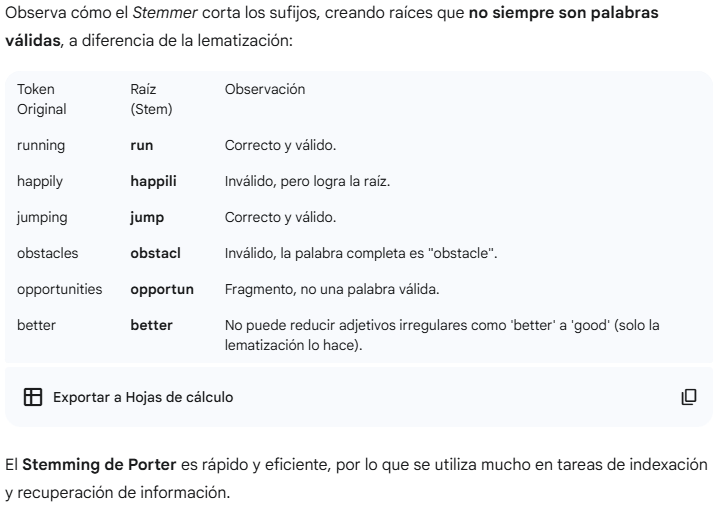

# CODIFICACION DE NUMEROS ENTEROS 😐

In [ ]:
"""
La codificación de números enteros en PLN (Processing Natural Language) en
Python generalmente se refiere a la técnica de asignar un identificador
numérico único a cada palabra o token en un vocabulario. Esto se llama Indexación
de Vocabulario (Vocabulary Indexing) o Tokenización a Enteros
(Token to Integer Mapping).

Esta codificación es fundamental porque los modelos de aprendizaje automático
solo pueden procesar datos numéricos, no cadenas de texto.
"""

In [49]:
from tensorflow.keras.preprocessing.text import Tokenizer

# 1. Texto de ejemplo
documentos = ["el gato salta", "el perro corre de cabeza", "el gato corre"]

# 2. Inicializar el Tokenizer
# num_words=None (usa todo el vocabulario), oov_token='<UNK>' asigna un token al 0
tokenizer = Tokenizer(oov_token="<UNK>")

# 3. Construir el vocabulario (fit)
# Esto asigna un índice a cada palabra única.
tokenizer.fit_on_texts(documentos)

# 4. Codificar los documentos (convertir a secuencias)
# Las palabras se reemplazan por sus índices enteros.
secuencias = tokenizer.texts_to_sequences(documentos)

print(f"Vocabulario e Índices (empezando en 1):")
print(tokenizer.word_index)
print(f"\nSecuencias Codificadas (Número Entero):")
print(secuencias)

Vocabulario e Índices (empezando en 1):
{'<UNK>': 1, 'el': 2, 'gato': 3, 'corre': 4, 'salta': 5, 'perro': 6, 'de': 7, 'cabeza': 8}

Secuencias Codificadas (Número Entero):
[[2, 3, 5], [2, 6, 4, 7, 8], [2, 3, 4]]


In [ ]:
"""
La técnica de relleno (padding) se utiliza para asegurar que todas las
secuencias de números enteros (que obtuviste de la codificación) tengan la
misma longitud. Esto es esencial porque las redes neuronales requieren arrays
de entrada con dimensiones uniformes.
"""

In [50]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Definir la longitud máxima deseada
# Aquí, elegimos la longitud de la secuencia más larga (5) o un número fijo (ej. 4).
max_longitud = 5

# Aplicar el relleno
secuencias_rellenadas = pad_sequences(
    secuencias,
    maxlen=max_longitud,
    padding='post',
    value=0
)

print(f"\nSecuencias Rellenadas (Todas de Longitud {max_longitud}):")
print(secuencias_rellenadas)

# Confirmar el tipo de dato final (es un array de NumPy)
print(f"\nTipo de Dato: {type(secuencias_rellenadas)}")


Secuencias Rellenadas (Todas de Longitud 5):
[[2 3 5 0 0]
 [2 6 4 7 8]
 [2 3 4 0 0]]

Tipo de Dato: <class 'numpy.ndarray'>


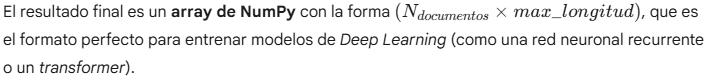